例題は$I = \int_0^1 \cos(x)\,\mathrm{d}x$です（$a=0$, $b=1$）．厳密な値は$I = \sin(1) = 0.8414...$ですが，上記のアルゴリズムをプログラミングして，その性質を考察してみましょう．なお，以下ではalgorithm2とalgorithm3, algorithm4のプログラムは未完成ですので，それを完成させるのが今週の**課題**です（それぞれ完成したら，それより下部の該当箇所のコメントアウトを外して実行してください）．

In [1]:
using Plots # プロット用

数値計算した結果の良し悪しをはかるために，（倍精度の範囲で）厳密な値を準備しておきます．
もちろん，多くの応用では，厳密に積分できないから数値積分するわけですが，厳密に積分できる例題を使うことによってアルゴリズムの特性を議論することができます（すなわち，どのような数学的主張が成り立ちそうか予想したり，厳密な積分ができない場合に数値積分結果の信頼性を議論したりするベースになります）．

In [2]:
Iexact = sin(1) # exact value

0.8414709848078965

以下では，$n$を大きくしていったときに，数値積分の値がIexactにどのように近づいていくかを議論していきます．そこで，$n$として$1,2,2^2,\dots, 2^{k-1}$の$k$通りを考えましょう（$\to$これらを配列 div に格納します）．$k$はとりあえず$10$としておきます．
また，$b-a=1$でしたから，刻み幅は$h = 1, 1/2, 1/2^2, \dots, 1/2^{k-1}$となります（$\to$これらを配列 hvec に格納します）．
配列 div と　hvec は一行で定義してしまうこともできますが，わかり易さを優先して for文 を使って定義しています．

In [3]:
# 空間刻み幅の設定
k = 10; # kパターン考える
div = zeros(k,1); # 分割数を配列で保持
hvec = zeros(k,1); # 刻み幅を配列で保持
for i = 1:k
    div[i,1] = 2^(i-1);
    hvec[i,1]  = 1/div[i,1]; 
end

algorithm1（矩形公式その1）用の配列と関数を定義します．<br>
関数algo1の引数は 「h: 刻み幅」，　「num: 分割数」, 「exact: 厳密な積分値」の三つです．
そして戻り値は「val: 数値計算した結果の値」，「err: valとexactの差の絶対値（つまり誤差）」の二つです．
このように，juliaではc言語と違って複数の戻り値を設定することができます．

In [4]:
val1 = zeros(k,1);
error1 = zeros(k,1);

function algo1(h,num,exact) # algorithm1（矩形公式その1）
    val = 0;
    for j = 0:num-1
        val += h*cos(h*j);
    end
    err = abs(exact - val);
    return val, err
end

algo1 (generic function with 1 method)

algorithm2（矩形公式その2），algorithm3（台形則），algorithm4（中点則）も同じような要領で定義してみましょう．

In [5]:
val2 = zeros(k,1);
error2 = zeros(k,1);

function algo2(h,num,exact) # algorithm2（矩形公式その2）
    val = 0;
    for j = 1:num
        # val += #ここを埋める
    end
    err = abs(exact - val);
    return val, err
end

algo2 (generic function with 1 method)

In [6]:
val3 = zeros(k,1);
error3 = zeros(k,1);

function algo3(h,num,exact) # algorithm3（台形則）
    val = 0;
    for j = 0:num
        # val += #ここを埋める（1行でかけない場合は，他の行を修正・追加したり工夫すること）
    end
    err = abs(exact - val);
    return val, err
end

algo3 (generic function with 1 method)

In [7]:
val4 = zeros(k,1);
error4 = zeros(k,1);

function algo4(h,num,exact) # algorithm4（中点則）
    val = 0;
    for j = 0:num-1
        # val += #ここを埋める
    end
    err = abs(exact - val);
    return val, err
end

algo4 (generic function with 1 method)

In [8]:
for i = 1:k
    val1[i,1], error1[i,1] = algo1(hvec[i,1],div[i,1],Iexact)
    val2[i,1], error2[i,1] = algo2(hvec[i,1],div[i,1],Iexact)
    val3[i,1], error3[i,1] = algo3(hvec[i,1],div[i,1],Iexact)
    val4[i,1], error4[i,1] = algo4(hvec[i,1],div[i,1],Iexact)
end

分割数を増やしていったときに，数値積分の値が厳密な値にどのように近づいていくかを図を描いて確認してみましょう．algorithm2とalgorithm3が完成したら，コメントアウトを解除してみてください（#を外してください）．

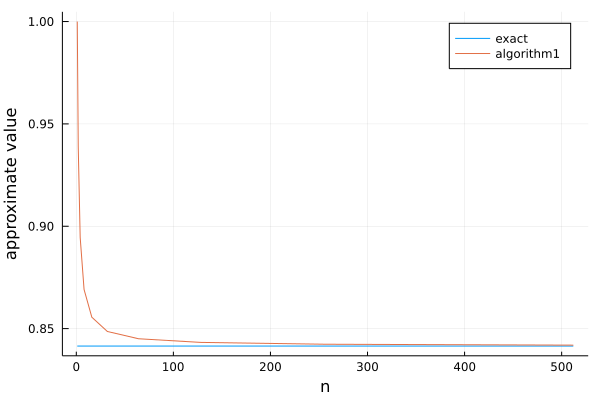

In [15]:
plot(div,Iexact*ones(k,1),label="exact")
plot!(div,val1,label="algorithm1")
# plot!(div,val2,label="algorithm2")
# plot!(div,val3,label="algorithm3")
# plot!(div,val4,label="algorithm4")
xlabel!("n")
ylabel!("approximate value")
# savefig("fig1.pdf") # シャープを外して実行すると，フォルダに画像が保存されます．

上のグラフから，分割数を増やしていくと数値積分の値は厳密な値に近づいていくことが確認できます（algorithm2とalgorithm3の結果もそのようになるはずです）．しかし，$n$が大きいときの近づき方は普通のグラフではなかなか正確に読み取れません．そこで，誤差をプロットしてみましょう．このとき，x軸やy軸のスケールに気をつける必要があります．「何を読み取りたいか」，あるいは「何を主張したいか」によって適切なスケールは変わってきますが，ここではy軸をlogスケール（底は10）で表示してみます．

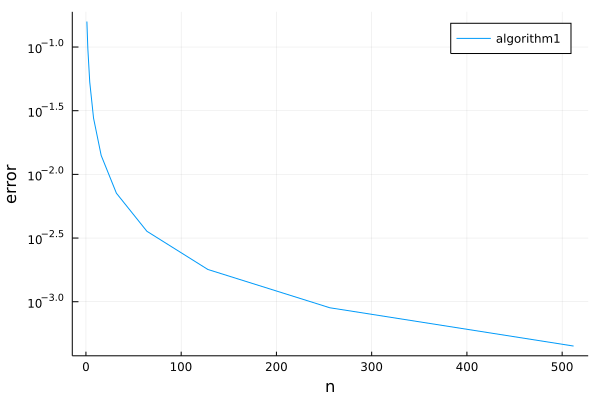

In [10]:
plot(div, error1, yaxis=:log, label="algorithm1")
# plot!(div, error2, yaxis=:log, label="algorithm2")
# plot!(div, error3, yaxis=:log, label="algorithm3")
# plot!(div, error4, yaxis=:log, label="algorithm4")
xlabel!("n")
ylabel!("error")
# savefig("fig2.pdf")

今度は，x軸もlogスケールにしてみましょう．

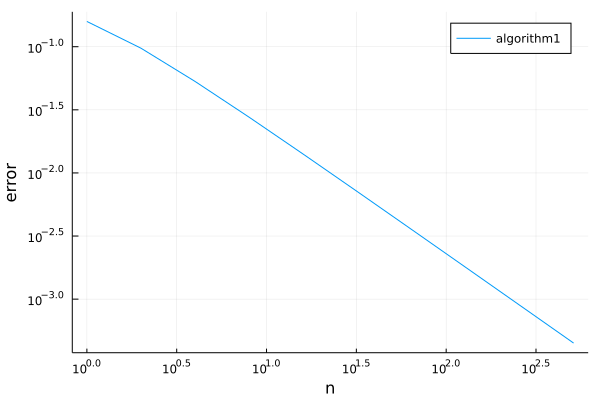

In [11]:
plot(div, error1, xaxis=:log, yaxis=:log, label="algorithm1")
# plot!(div, error2, xaxis=:log, yaxis=:log, label="algorithm2")
# plot!(div, error3, xaxis=:log, yaxis=:log, label="algorithm3")
# plot!(div, error4, xaxis=:log, yaxis=:log, label="algorithm4")
xlabel!("n")
ylabel!("error")
# savefig("fig3.pdf")

結果は直線になりました．このグラフからは，例えば，誤差を$10^{-8}$以下にするには$n$をどのくらいの大きさにすべきかが簡単に予想できて便利です．また，理論的な解析を行う際にも，どのような主張が成り立つか予想がたてやすくなります．